In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style = 'white', palette = 'pastel')


In [141]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Data-Code/Daily_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
data

,Date,AdjClose,synthetic_daily
0,2021/2/23,245.529999,198.707945
1,2021/2/24,248.449997,205.128890
2,2021/2/25,243.690002,205.484121
3,2021/2/26,240.509995,202.371377
4,2021/3/1,249.210007,203.311994
...,...,...,...
247,2022/2/14,314.279999,202.220479
248,2022/2/15,316.200012,202.392183
249,2022/2/16,315.649994,203.806622
250,2022/2/17,313.549988,203.038741


In [143]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


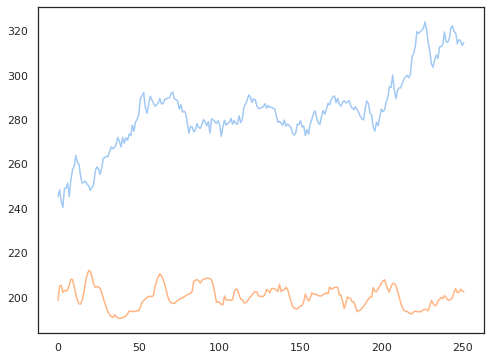

In [144]:
figure, axes = plt.subplots(figsize=(8, 6))
axes.plot(data.index,data["AdjClose"])
axes.plot(data.index,data["synthetic_daily"])

In [145]:
data["true_log_return"] = np.log(data["AdjClose"]/data["AdjClose"].shift(1))
data["synthetic_log_return"] = np.log(data["synthetic_daily"]/data["synthetic_daily"].shift(1))


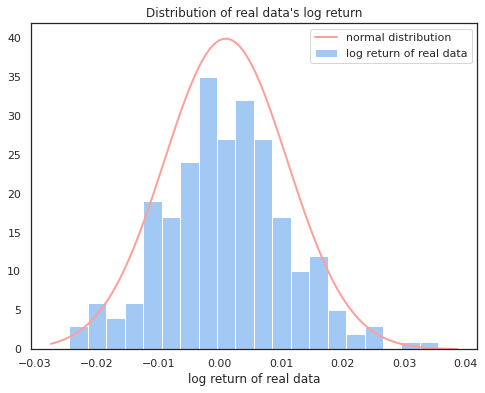

In [146]:
from scipy.stats import norm

figure, axes = plt.subplots(figsize=(8, 6))
plt.hist(data["true_log_return"],bins  = 20,label = "log return of real data")
plt.xlabel("log return of real data")
plt.title("Distribution of real data's log return")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
avg_real_log = data["true_log_return"].mean()
std_real_log = data["true_log_return"].std()
p = norm.pdf(x, avg_real_log, std_real_log)
  
plt.plot(x, p, 'k', linewidth=2,color = "r",label = "normal distribution")
plt.legend()
plt.show()

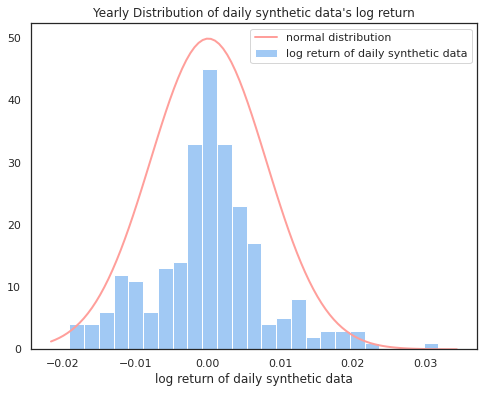

In [147]:
figure, axes = plt.subplots(figsize=(8, 6))
plt.hist(data["synthetic_log_return"],bins  = 25,label = "log return of daily synthetic data")
plt.xlabel("log return of daily synthetic data")
plt.title("Yearly Distribution of daily synthetic data's log return")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
avg_synthetic_log = data["synthetic_log_return"].mean()
std_synthetic_log = data["synthetic_log_return"].std()
p = norm.pdf(x, avg_synthetic_log, std_synthetic_log)
  
plt.plot(x, p, linewidth=2,color = "r",label = "normal distribution")
plt.legend()
plt.show()
figure.savefig("daily_synthetic.svg")

In [148]:
data = data[:63].copy()
data

,Date,AdjClose,synthetic_daily,true_log_return,synthetic_log_return
0,2021/2/23,245.529999,198.707945,NaN,NaN
1,2021/2/24,248.449997,205.128890,0.011822,0.031802
2,2021/2/25,243.690002,205.484121,-0.019345,0.001730
3,2021/2/26,240.509995,202.371377,-0.013135,-0.015264
4,2021/3/1,249.210007,203.311994,0.035534,0.004637
...,...,...,...,...,...
58,2021/5/17,289.220001,200.383799,-0.005035,-0.001292
59,2021/5/18,287.589996,200.956016,-0.005652,0.002852
60,2021/5/19,286.220001,204.883033,-0.004775,0.019353
61,2021/5/20,286.730011,207.551492,0.001780,0.012940


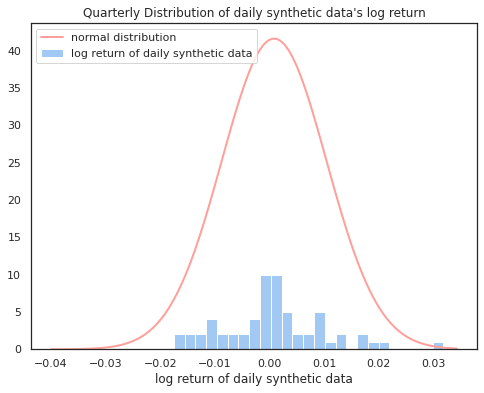

In [149]:
figure, axes = plt.subplots(figsize=(8, 6))
plt.hist(data["synthetic_log_return"],bins  = 25,label = "log return of daily synthetic data")
plt.xlabel("log return of daily synthetic data")
plt.title("Quarterly Distribution of daily synthetic data's log return")

xmin, xmax = plt.xlim()
x = np.linspace(-0.04, xmax, 100)
avg_synthetic_log = data["synthetic_log_return"].mean()
std_synthetic_log = data["synthetic_log_return"].std()
p = norm.pdf(x, avg_synthetic_log, std_synthetic_log)
  
plt.plot(x, p, linewidth=2,color = "r",label = "normal distribution")
plt.legend()
plt.show()
figure.savefig("daily_synthetic.svg")

In [150]:
half_hour_data = pd.read_csv('/content/drive/My Drive/Data-Code/30mins_data.csv')
data = half_hour_data

In [151]:
data["true_log_return"] = np.log(data["ThirtyMin"]/data["ThirtyMin"].shift(1))
data["synthetic_log_return"] = np.log(data["synthetic_30min"]/data["synthetic_30min"].shift(1))



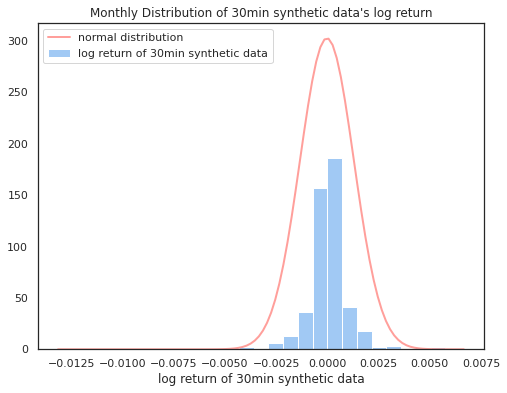

In [152]:
figure, axes = plt.subplots(figsize=(8, 6))
plt.hist(data["synthetic_log_return"],bins  = 25,label = "log return of 30min synthetic data")
plt.xlabel("log return of 30min synthetic data")
plt.title("Monthly Distribution of 30min synthetic data's log return")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
avg_synthetic_log = data["synthetic_log_return"].mean()
std_synthetic_log = data["synthetic_log_return"].std()
p = norm.pdf(x, avg_synthetic_log, std_synthetic_log)
  
plt.plot(x, p, linewidth=2,color = "r",label = "normal distribution")
plt.legend()
plt.show()
figure.savefig("daily_synthetic.svg")

In [153]:
data = data.iloc[:80].copy()
data["synthetic_log_return"]

0          NaN
1    -0.012255
2    -0.009784
3    -0.000098
4     0.000226
        ...   
75   -0.000071
76   -0.000084
77   -0.000151
78   -0.000687
79    0.000049
Name: synthetic_log_return, Length: 80, dtype: float64

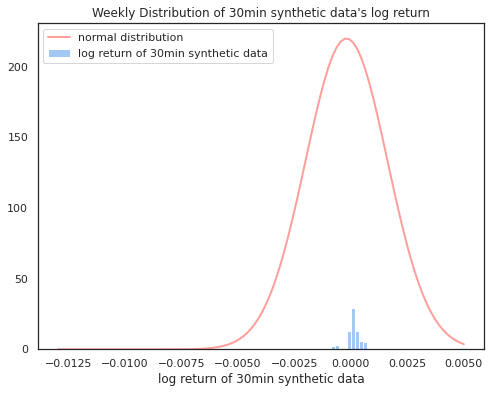

In [154]:
figure, axes = plt.subplots(figsize=(8, 6))
plt.hist(data["synthetic_log_return"],bins  = 80,label = "log return of 30min synthetic data")
plt.xlabel("log return of 30min synthetic data")
plt.title("Weekly Distribution of 30min synthetic data's log return")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, 0.005, 100)
avg_synthetic_log = data["synthetic_log_return"].mean()
std_synthetic_log = data["synthetic_log_return"].std()
p = norm.pdf(x, avg_synthetic_log, std_synthetic_log)
  
plt.plot(x, p, linewidth=2,color = "r",label = "normal distribution")
plt.legend()
plt.show()
figure.savefig("daily_synthetic.svg")